In [59]:
import numpy as np

# Fictitious Play

Consider a zero-sum normal form game. Then using Brown's Fictitious Play algorithm (1951), we can iteratively find a Nash equilibrium strategy. This algorithm converges for zero-sum games [Robinson 1951].

### Algorithm Description:

Consider player 1 uses strategy $x(t)$ at iteration $t$ and player 2 uses strategy $y(t)$ at iteration $t$. 

Consider $BR(\sigma)$ to be the best response pure-strategy to $\sigma$. Then for the $t$th move, we have
$$i_{t+1} = BR_1(y(t))$$
$$j_{t} = BR_2(x(t))$$

(Note that we update alternatingly which has better convergence properties than simultaneous updates)

And the strategy is updated like:
$$x(t) = \frac{1}{t}\sum_{s=1}^t i_s$$
$$y(t) = \frac{1}{t}\sum_{s=1}^t j_s$$

We can update it more efficiently like so:
$$x(t + 1) = \frac{t}{t+1}x(t) + \frac{1}{t+1}i_{t+1}$$

$$y(t + 1) = \frac{t}{t+1}y(t) + \frac{1}{t+1}j_{t+1}$$



In [60]:
def BR1(M, y):
    return np.argmax(M@y)

def BR2(M, x):
    return np.argmin(M.T@x)
    
def runalg(M, x, y, T):
    for t in range(1, T):
        it1 = np.array([0]*3)
        it1[BR1(M, y[t-1])] = 1
        x.append(t/(t+1)*x[t-1] + 1/(t+1)*it1)
        jt = np.array([0]*3)
        jt[BR2(M, x[t])] = 1
        y.append(t/(t+1)*y[t-1] + 1/(t+1)*jt)
    return x, y

### Example: Rock Paper Scissor

Consider the game of Rock-Paper-Scissor defined by the following payoff matrix $M$ where player 2 pays $M_{ij}$ to player 1 if player 1 chooses move $i$ and player 2 chooses move $j$.

| | Rock | Paper | Scissors |
| --- | --- | --- | |
| Rock | 0 | -1 | 1 |
| Paper | 1 | 0 | -1 |
| Scissors | -1 | 1 | 0 |



In [61]:
M = np.matrix([[0, -1, 1],
              [1, 0, -1],
              [-1, 1, 0]])

x_init = np.array([0, 0, 1]) #initial move is chosen arbitrarily
y_init = np.array([1, 0, 0])

x = [x_init]
y = [y_init]

x,y = runalg(M, x, y, 1000)
print(x[-1])
print(y[-1])

[0.329 0.335 0.336]
[0.333 0.334 0.333]


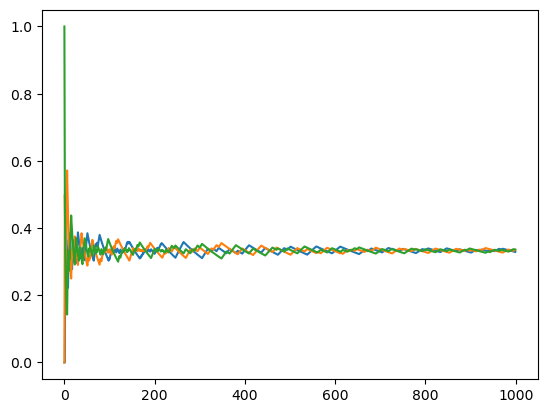

In [62]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

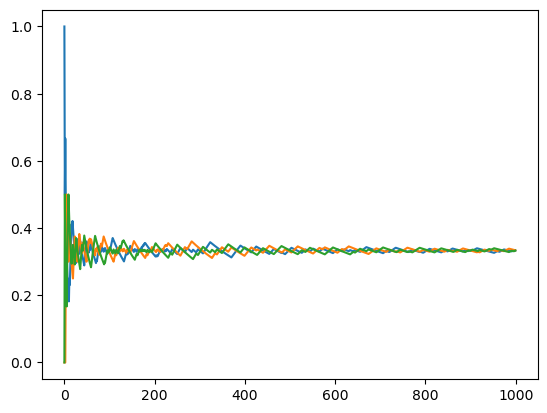

In [63]:
plt.plot(y)
plt.show()

#### Therefore, we can see this algorithm converges to a Nash equilibrium for both players.

# 

### Example 2: Weighted Rock Paper Scissor (symmetric)

Consider the game of Rock-Paper-Scissor defined by the following payoff matrix $M$ where player 2 pays $M_{ij}$ to player 1 if player 1 chooses move $i$ and player 2 chooses move $j$.

This time, we give different weights to different interactions.

| | Rock | Paper | Scissors |
| --- | --- | --- | |
| Rock | 0 | -3 | 2 |
| Paper | 3 | 0 | -1 |
| Scissors | -2 | 1 | 0 |


In [64]:
M = np.matrix([[0, -3, 2],
              [3, 0, -1],
              [-2, 1, 0]])

x_init = np.array([0, 0, 1]) #initial move is chosen arbitrarily
y_init = np.array([1, 0, 0])

x = [x_init]
y = [y_init]

x,y = runalg(M, x, y, 5000)
print(x[-1])
print(y[-1])

[0.167  0.3342 0.4988]
[0.1674 0.3332 0.4994]


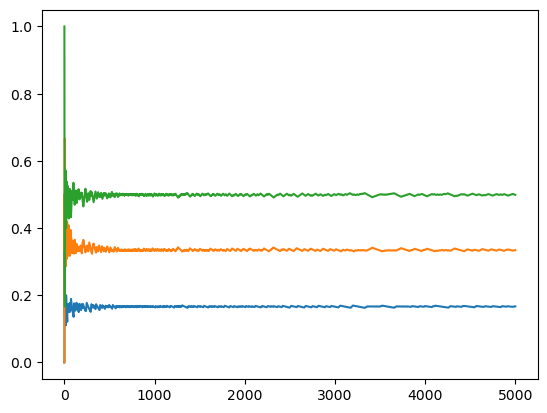

In [65]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

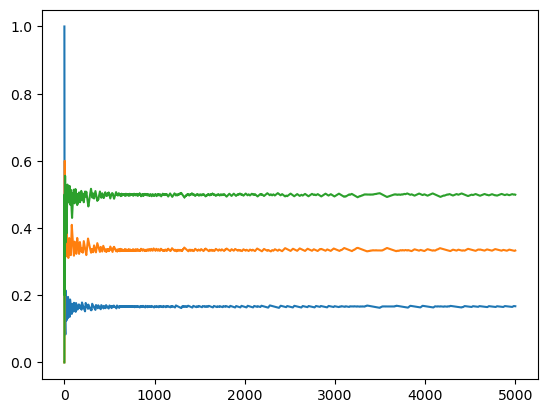

In [66]:
plt.plot(y)
plt.show()

In [67]:
print("Expected Payoff of P1", M@y[-1])
print("Expected Payoff of P2", M.T@x[-1])

Expected Payoff of P1 [[-0.0008  0.0028 -0.0016]]
Expected Payoff of P2 [[ 0.005  -0.0022 -0.0002]]


#### Now we can see that the equilibrium strategies are approaching [1/6, 1/3, 1/2] for both players.
#### We can see that this is a Nash equilibrium because if P1 plays the mixed strategy [1/6, 1/3, 1/2], then P2's expected payoff would stay 0 no matter what they play. By symmetry, same applies for P1, therefore this is a Nash equilibrium.

# 

### Example 2: Weighted Rock Paper Scissor (non-symmetric)

Consider the game of Rock-Paper-Scissor defined by the following payoff matrix $M$ where player 2 pays $M_{ij}$ to player 1 if player 1 chooses move $i$ and player 2 chooses move $j$.

This time, we give different weights to different interactions.

| | Rock | Paper | Scissors |
| --- | --- | --- | |
| Rock | 0 | -6 | 4 |
| Paper | 3 | 0 | -5 |
| Scissors | -2 | 1 | 0 |


In [68]:
M = np.matrix([[0, -6, 4],
              [3, 0, -5],
              [-2, 1, 0]])

x_init = np.array([0, 0, 1]) #initial move is chosen arbitrarily
y_init = np.array([1, 0, 0])

x = [x_init]
y = [y_init]

x,y = runalg(M, x, y, 10000)
print(x[-1])
print(y[-1])

[0.1767 0.2369 0.5864]
[0.3811 0.2947 0.3242]


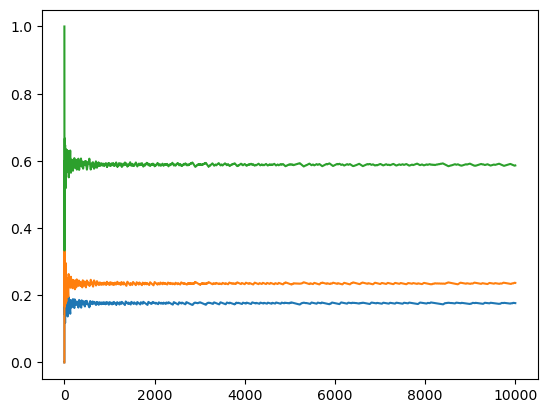

In [69]:
import matplotlib.pyplot as plt
plt.plot(x)
plt.show()

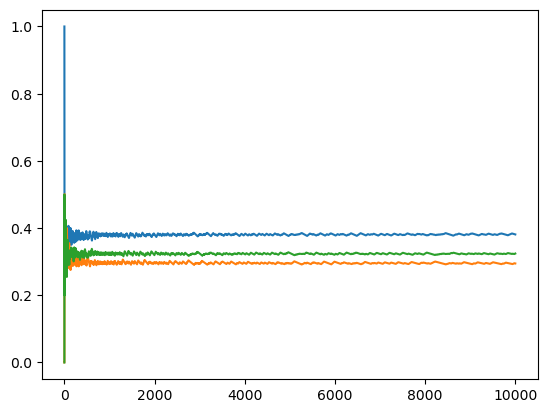

In [70]:
plt.plot(y)
plt.show()

In [71]:
print("Expected Payoff of P1", M@y[-1])
print("Expected Payoff of P2", M.T@x[-1])

Expected Payoff of P1 [[-0.4714 -0.4777 -0.4675]]
Expected Payoff of P2 [[-0.4621 -0.4738 -0.4777]]


#### Since the expected payoff for each move is the same, all strategies will have the same expected payoff. Therefore, this is a Nash Equilibrium where player 2 is expected to win $0.47 